<a href="https://colab.research.google.com/github/vinthegreat84/weathering/blob/master/EDA_Geochemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA: Geochemistry**



In [1]:
# importing all the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import plotnine

!pip install dfply
import dfply
from dfply import *

from plotnine import ggplot, aes

# package for plot scales
from mizani.formatters import comma_format

import ipywidgets

import warnings
warnings.filterwarnings('ignore') 

     |████████████████████████████████| 614kB 3.9MB/s 


In [22]:
# Loading the data set 
# data = pd.read_csv('elements_Lone_et_al._2017_&_Hussain_and_Bharali,_2019.csv')
data = pd.read_csv('https://github.com/vinthegreat84/weathering.git/elements_Lone_et_al._2017_&_Hussain_and_Bharali,_2019.csv')

HTTPError: ignored

In [3]:
data.head()

,sample,type,SiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,TiO2,P2O5
0,UCC,UCC,65.89,15.17,4.49,0.07,2.20,4.19,3.89,3.39,0.50,0.20
1,PAAS,shale_composite,62.80,18.90,7.20,0.11,2.20,1.30,1.20,3.70,1.00,0.16
2,NASC,shale_composite,64.80,16.90,5.70,0.06,2.90,3.40,1.00,3.80,0.78,0.13
3,granite,igneous_composite,71.30,14.32,2.85,0.05,0.71,1.84,3.68,4.07,0.31,0.12
4,granodiorite,igneous_composite,66.37,15.90,3.94,0.08,1.66,3.42,3.51,2.91,0.53,0.15


In [4]:
data.info

<bound method DataFrame.info of           sample               type   SiO2  Al2O3  ...  Na2O   K2O  TiO2  P2O5
0            UCC                UCC  65.89  15.17  ...  3.89  3.39  0.50  0.20
1           PAAS    shale_composite  62.80  18.90  ...  1.20  3.70  1.00  0.16
2           NASC    shale_composite  64.80  16.90  ...  1.00  3.80  0.78  0.13
3        granite  igneous_composite  71.30  14.32  ...  3.68  4.07  0.31  0.12
4   granodiorite  igneous_composite  66.37  15.90  ...  3.51  2.91  0.53  0.15
5         basalt  igneous_composite  49.20  15.74  ...  2.91  1.10  1.84  0.35
6      kaolinite     clay_composite  44.50  38.60  ...  0.10  0.10  0.30  0.10
7       smectite     clay_composite  56.50  17.20  ...  0.90  0.70  0.20  0.00
8           MBG1      lake_sediment  50.27  15.22  ...  1.01  2.20  0.50  0.44
9           MBG2      lake_sediment  50.67  14.00  ...  3.51  2.99  0.75  0.49
10          MBG3      lake_sediment  52.42  13.40  ...  2.05  1.48  0.74  0.24
11          MBG4    

In [5]:
data.shape

(48, 12)

In [6]:
data.columns

Index(['sample', 'type', 'SiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'TiO2', 'P2O5'],
      dtype='object')

In [7]:
data.describe()

,SiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,TiO2,P2O5
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,60.711042,14.614792,4.237917,0.075625,2.026458,7.109792,1.772083,1.907083,0.619375,0.148542
std,10.947072,4.325943,1.534870,0.051127,0.972939,6.747405,0.819065,0.825338,0.245308,0.096005
min,44.500000,7.440000,0.400000,0.001300,0.100000,0.100000,0.100000,0.100000,0.200000,0.000000
25%,50.605000,12.567500,3.440000,0.049675,1.517500,0.885000,1.217500,1.462500,0.500000,0.087500
50%,57.715000,14.395000,4.125000,0.060000,2.140000,3.805000,1.605000,1.740000,0.625000,0.120000
75%,71.240000,15.725000,4.777500,0.080000,2.352500,13.672500,2.055000,2.205000,0.690000,0.162500
max,81.590000,38.600000,10.920000,0.300000,6.730000,22.630000,3.890000,4.070000,1.840000,0.490000


In [8]:
data.nunique()

sample    48
type       7
SiO2      48
Al2O3     48
Fe2O3     48
MnO       16
MgO       43
CaO       47
Na2O      43
K2O       41
TiO2      34
P2O5      22
dtype: int64

In [9]:
data['sample'].nunique()

48

In [10]:
data['sample'].unique()

array(['UCC', 'PAAS', 'NASC', 'granite', 'granodiorite', 'basalt',
       'kaolinite', 'smectite', 'MBG1', 'MBG2', 'MBG3', 'MBG4', 'MBG5',
       'MBG6', 'MBG7', 'MBG8', 'MBG9', 'MBG10', 'MBG11', 'MBG12', 'MBG13',
       'MBG14', 'MBG15', 'MBG16', 'MBG17', 'MBG18', 'MBG19', 'MBG20',
       'MBG21', 'MBG22', 'SAR-5', 'SAS-5', 'SAT-2', 'SAZ-3', 'SBD-7',
       'SCT-23', 'SCT-57', 'SCT-60', 'SCT-62', 'SVC-7', 'SCZ-3', 'SCZ-4',
       'SCZ-12', 'SCZ-14', 'SCT-7', 'SCT-8', 'SCT-11', 'SCT-12'],
      dtype=object)

In [11]:
data.isnull()

,sample,type,SiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,TiO2,P2O5
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().any()

sample    False
type      False
SiO2      False
Al2O3     False
Fe2O3     False
MnO       False
MgO       False
CaO       False
Na2O      False
K2O       False
TiO2      False
P2O5      False
dtype: bool

In [13]:
data.isnull().sum()

sample    0
type      0
SiO2      0
Al2O3     0
Fe2O3     0
MnO       0
MgO       0
CaO       0
Na2O      0
K2O       0
TiO2      0
P2O5      0
dtype: int64

In [14]:
data.isna()

,sample,type,SiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,TiO2,P2O5
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isna().any()

sample    False
type      False
SiO2      False
Al2O3     False
Fe2O3     False
MnO       False
MgO       False
CaO       False
Na2O      False
K2O       False
TiO2      False
P2O5      False
dtype: bool

In [16]:
data.isna().sum()

sample    0
type      0
SiO2      0
Al2O3     0
Fe2O3     0
MnO       0
MgO       0
CaO       0
Na2O      0
K2O       0
TiO2      0
P2O5      0
dtype: int64

In [17]:
data >> select(X.SiO2, X.Al2O3)

,SiO2,Al2O3
0,65.89,15.17
1,62.80,18.90
2,64.80,16.90
3,71.30,14.32
4,66.37,15.90
5,49.20,15.74
6,44.50,38.60
7,56.50,17.20
8,50.27,15.22
9,50.67,14.00


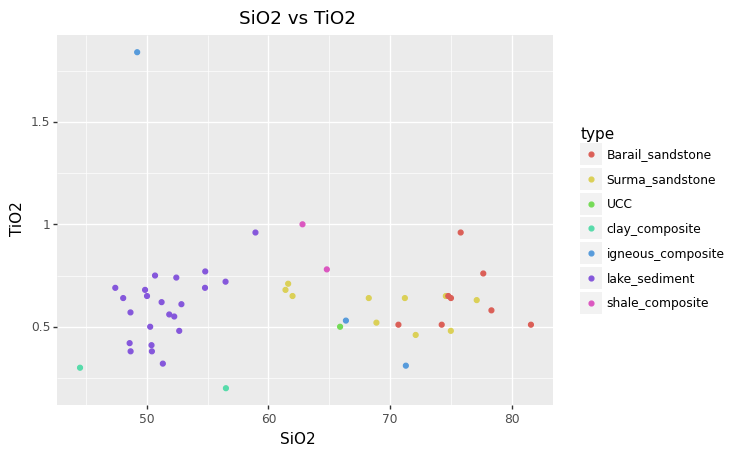

<ggplot: (8734185523785)>

In [18]:
p = ggplot(data=data, mapping=aes(x='SiO2', y='TiO2', color='type')) + plotnine.geom_point() + plotnine.labs(title='SiO2 vs TiO2')
p

In [21]:
# Chemical Index of Weathering (CIW) after Harnois, 1988
data['CIW'] = 100 * data['Al2O3']/101.9618 / (data['Al2O3']/101.9618 + data['CaO']/56.0794 + data['Na2O']/61.97894) 

# Chemical Proxy of Alteration (CPA) after Buggle et al., 2011  
data['CPA'] = 100 * data['Al2O3']/101.9618 / (data['Al2O3']/101.9618 + data['Na2O']/61.97894) 

# Chemical Index of Alteration (CIA) after Nesbitt and Young, 1982
data['CIA'] = 100 * data['Al2O3']/101.9618 / (data['Al2O3']/101.9618 + data['CaO']/56.0794 + data['Na2O']/61.97894 + data['K2O']/94.1954) 

# Plagioclase Index of Alteration (PIA) after Fedo et al., 1995
data['PIA'] = 100 * (data['Al2O3']/101.9618 - data['K2O']/94.1954) / (data['Al2O3']/101.9618 + data['CaO']/56.0794 + data['Na2O']/61.97894 - data['K2O']/94.1954) 

# Modified Chemical Index of Alteration (CIX) after Garzanti et al., 2014                                                            
data['CIX'] = 100 * data['Al2O3']/101.9618 / (data['Al2O3']/101.9618 + data['Na2O']/61.97894 + data['K2O']/94.1954) 

# Index of Compositional Variability (ICV) after Cox et al., 1995
data['ICV'] = 100 * (data['Fe2O3']/159.69 + data['K2O']/94.1954 + data['Na2O']/61.97894 + data['CaO']/56.0794 + data['MgO']/40.3044 + data['MnO']/70.9374 + data['TiO2']/79.866) / data['Al2O3']/101.9618

# Weathering Index of Parker (WIP) after Parker, 1970
data['WIP'] = 100 * (2*(data['Na2O']/61.97894)/0.35 + (data['MgO']/40.3044)/0.9 + 2*(data['K2O']/94.1954)/0.25 + (data['CaO']/56.0794)/0.7)                                           

# Ruxton Ratio (R) after Ruxton, 1968                                                                                               
data['R'] = data['SiO2']/60.08 / data['Al2O3']/101.9618

# Vogt’s Residual Index (V) after Vogt, 1927, Roaldset, 1972
data['V'] = (data['Al2O3']/101.9618 + data['K2O']/94.1954) / (data['MgO']/40.3044 + data['CaO']/56.0794 + data['Na2O']/61.97894) 

# Silica–Titania Index (STI) after de Jayawardena and Izawa, 1994
data['STI'] = 100 * (((data['SiO2']/60.08)/(data['TiO2']/79.866))/(((data['SiO2']/60.08)/(data['TiO2']/79.866)) + ((data['SiO2']/60.08)/(data['Al2O3']/101.9618)) + ((data['Al2O3']/101.9618)/(data['SiO2']/60.08))))

# Modified Weathering Potential Index (MWPI) after Reiche, 1943, Vogel, 1975
data['MWPI'] = 100 * (data['Na2O']/61.97894 + data['K2O']/94.1954 + data['CaO']/56.0794 + data['MgO']/40.3044) / (data['Na2O']/61.97894 + data['K2O']/94.1954 + data['CaO']/56.0794 + data['MgO']/40.3044 + data['SiO2']/60.08 + data['Al2O3']/101.9618)

# Product of Weathering Index (PWI) after Souri et. al., 2006
data ['PWI'] = 100 * (data['SiO2']/60.08 / (data['TiO2']/79.866 + data['Fe2O3']/159.69 + data['SiO2']/60.08 + data['Al2O3']/101.9618))

In [20]:
# function definition of ternary plot
def ternary(a, b, c, color, labels):
  ternary = px.scatter_ternary(data, a = a, b = b, c = c, color = color, labels=labels)
  ternary.update_layout({'ternary': {'sum': 100}})
  ternary.show()

# A - C - N plot
ACN = ternary(data['Al2O3']/101.9618, data['CaO']/56.0794, data['Na2O']/61.97894, data['type'], {"a": "Al<sub>2</sub>O<sub>3</sub>", "b": "CaO*", "c": "Na<sub>2</sub>O"})

# A - CN - K plot
ACNK = ternary(data['Al2O3']/101.9618, data['CaO']/56.0794 + data['Na2O']/61.97894, data['K2O']/94.1954, data['type'], {"a": "Al<sub>2</sub>O<sub>3</sub>", "b": "CaO*+Na<sub>2</sub>O", "c": "K<sub>2</sub>O"})

# A-K - C - N plot
AKCN = ternary(data['Al2O3']/101.9618 - data['K2O']/94.1954, data['CaO']/56.0794, data['Na2O']/61.97894, data['type'], {"a": "Al<sub>2</sub>O<sub>3</sub> - K<sub>2</sub>O", "b": "CaO*", "c": "Na<sub>2</sub>O"})

# M - F - W plot
## eight oxides (SiO2, TiO2, Al2O3, Fe2O3, MgO, CaO, Na2O and K2O) used in the formulas and re-closing to 100 wt.% (expressed as OXIDE.100 = 100*OXIDE/sum)
data['sum'] = data[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MgO', 'CaO', 'Na2O', 'K2O']].sum(axis=1)

data['SiO2.100']  = 100 * data['SiO2']  / data['sum']
data['TiO2.100']  = 100 * data['TiO2']  / data['sum']
data['Al2O3.100'] = 100 * data['Al2O3'] / data['sum']
data['Fe2O3.100'] = 100 * data['Fe2O3'] / data['sum']
data['MgO.100']   = 100 * data['MgO']   / data['sum']
data['CaO.100']   = 100 * data['CaO']   / data['sum']
data['Na2O.100']  = 100 * data['Na2O']  / data['sum']
data['K2O.100']   = 100 * data['K2O']   / data['sum']

## M - F - W apices calculation after Ohta and Arai, 2007
### Step 1 of the formulas for calculating vertices (M, F and W) of M - F - W compositional space diagram
data['M'] = - 0.395*np.log(data['SiO2.100']) + 0.206*np.log(data['TiO2.100']) - 0.316*np.log(data['Al2O3.100']) + 0.160*np.log(data['Fe2O3.100']) + 0.246*np.log(data['MgO.100']) + 0.368*np.log(data['CaO.100']) + 0.073*np.log(data['Na2O.100']) - 0.342*np.log(data['K2O.100']) + 2.266
data['F'] = + 0.191*np.log(data['SiO2.100']) - 0.397*np.log(data['TiO2.100']) + 0.020*np.log(data['Al2O3.100']) - 0.375*np.log(data['Fe2O3.100']) - 0.243*np.log(data['MgO.100']) + 0.079*np.log(data['CaO.100']) + 0.392*np.log(data['Na2O.100']) + 0.333*np.log(data['K2O.100']) - 0.892
data['W'] = + 0.203*np.log(data['SiO2.100']) + 0.191*np.log(data['TiO2.100']) + 0.296*np.log(data['Al2O3.100']) + 0.215*np.log(data['Fe2O3.100']) - 0.002*np.log(data['MgO.100']) - 0.448*np.log(data['CaO.100']) - 0.464*np.log(data['Na2O.100']) + 0.008*np.log(data['K2O.100']) - 1.374

### Step 2 of the formulas for calculating vertices (M, F and W) of M - F - W compositional space diagram
data['M'] = np.exp(data['M'])
data['F'] = np.exp(data['F'])
data['W'] = np.exp(data['W'])

## ternary plot drawing
MFW = ternary(data['M'], data['F'], data['W'], data['type'], {"a": "M", "b": "F", "c": "W"})

# A - CNK - FM plot
ACNKFM = ternary(data['Al2O3']/101.9618, data['CaO']/56.0794 + data['Na2O']/61.97894 + data['K2O']/94.1954, data['Fe2O3']/159.69 + data['MgO']/40.3044, data['type'], {"a": "Al<sub>2</sub>O<sub>3</sub>", "b": "CaO*+Na<sub>2</sub>O+K<sub>2</sub>O", "c": "Fe<sub>2</sub>O<sub>3</sub>+MgO"})

# A - N - K plot
ANK = ternary(data['Al2O3']/101.9618, data['Na2O']/61.97894, data['K2O']/94.1954, data['type'], {"a": "Al<sub>2</sub>O<sub>3</sub>", "b": "Na<sub>2</sub>O", "c": "K<sub>2</sub>O"})